In [1]:
import numpy as np
import scipy
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

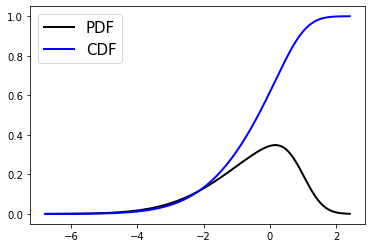

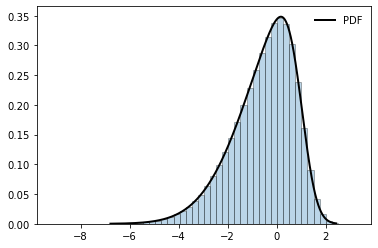

In [2]:
a     = -4
loc   =  1
scale =  2
rv = skewnorm(a=a, loc=loc, scale=scale)

mean, var, skew, kurt = rv.stats(moments='mvsk')

x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)

plt.figure

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='PDF')
plt.plot(x, rv.cdf(x), 'b-', lw=2, label='CDF')
plt.legend(fontsize=15)
plt.show()

plt.figure
r = skewnorm.rvs(a, loc=loc, scale=scale, size=10**6)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='PDF')
plt.hist(r, bins=50, density=True, ec='black', alpha=0.3)
plt.legend(loc='best', frameon=False)
plt.show()

In [3]:
print('mean : {:14.10f}'.format(mean))
print('var  : {:14.10f}'.format(var))
print('skew : {:14.10f}'.format(skew))
print('kurt : {:14.10f}'.format(kurt))

alpha = a

print('\n', '-'*10, 'original', '-'*9, sep='')
print('alpha: {:14.10f}'.format(alpha))
print('scale: {:14.10f}'.format(scale))
print('loc  : {:14.10f}'.format(loc))

def return_stuff(mean, var, skew):
    pi     = np.pi
    if skew>=0:
        beta = ((2*skew)/(4-pi))**(1/3)
    else:
        beta = -((2*np.abs(skew))/(4-pi))**(1/3)
    delta  = np.sqrt(pi/2)*beta/np.sqrt(1+beta*beta)
    delta2 = delta*delta
    alpha  = delta/np.sqrt(1-delta2) 
    scale  = np.sqrt(var/(1-2*delta2/pi))
    loc    = mean-scale*delta*np.sqrt(2/pi)
    return loc, scale, alpha

print('\n', '-'*10, 'checked', '-'*10, sep='')
loc_check, scale_check, alpha_check = return_stuff(mean, var, skew)
print('alpha: {:14.10f}'.format(alpha_check))
print('scale: {:14.10f}'.format(scale_check))
print('loc  : {:14.10f}'.format(loc_check))

mean :  -0.5481234453
var  :   1.6033137981
skew :  -0.7844267554
kurt :   0.6327847548

----------original---------
alpha:  -4.0000000000
scale:   2.0000000000
loc  :   1.0000000000

----------checked----------
alpha:  -4.0000000000
scale:   2.0000000000
loc  :   1.0000000000


In [4]:
# now compute moments from data
mean_r = scipy.stats.tmean(r)
var_r  = scipy.stats.tvar(r)
skew_r = scipy.stats.skew(r)
kurt_r = scipy.stats.kurtosis(r)

print('mean : {:8.5f} ({:9.5f} %)'.format(mean_r, 100*(mean-mean_r)/mean))
print('var  : {:8.5f} ({:9.5f} %)'.format(var_r,  100*(var -var_r)/var))
print('skew : {:8.5f} ({:9.5f} %)'.format(skew_r, 100*(skew-skew_r)/skew))
print('kurt : {:8.5f} ({:9.5f} %)'.format(kurt_r, 100*(kurt-kurt_r)/kurt))
print('\n')
loc_r, scale_r, alpha_r = return_stuff(mean_r, var_r, skew_r)
print('alpha: {:8.5f} ({:9.5f} %)'.format(alpha_r, 100*(alpha-alpha_r)/alpha))
print('scale: {:8.5f} ({:9.5f} %)'.format(scale_r, 100*(scale-scale_r)/scale))
print('loc  : {:8.5f} ({:9.5f} %)'.format(loc_r,   100*(loc - loc_r)/loc))

mean : -0.54934 ( -0.22240 %)
var  :  1.60729 ( -0.24769 %)
skew : -0.78505 ( -0.08002 %)
kurt :  0.63478 ( -0.31484 %)


alpha: -4.00728 ( -0.18212 %)
scale:  2.00280 ( -0.13977 %)
loc  :  1.00111 ( -0.11104 %)


In [5]:
alpha = 1
loc   = 1
scale = 1

err_loc   = []
err_scale = []
err_alpha = []
N = []
for i in range(20):
    N.append(round(32*2**i))

for i in range(len(N)):
    r = skewnorm.rvs(alpha, loc=loc, scale=scale, size=N[i])
    mean_r = scipy.stats.tmean(r)
    var_r  = scipy.stats.tvar(r)
    skew_r = scipy.stats.skew(r)
    kurt_r = scipy.stats.kurtosis(r)
    loc_r, scale_r, alpha_r = return_stuff(mean_r, var_r, skew_r)
    err_loc.append(   (loc-loc_r)/loc )
    err_scale.append( (scale-scale_r)/scale)
    err_alpha.append( (alpha-alpha_r)/alpha)
err_loc   = np.array(err_loc)
err_scale = np.array(err_scale)
err_alpha = np.array(err_alpha)

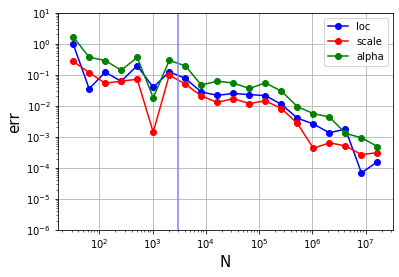

In [6]:
plt.figure
plt.plot(N, np.abs(err_loc),   'bo-', label='loc')
plt.plot(N, np.abs(err_scale), 'ro-', label='scale')
plt.plot(N, np.abs(err_alpha), 'go-', label='alpha')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(visible=True)
plt.ylim([1e-6,10])
plt.xlabel('N', fontsize=15)
plt.ylabel('err', fontsize=15)
plt.axvline(x=3000, color=[0.5,0.5,1])
plt.show()